# Sentiment Analysis of 'overview' col. for TV_Show data set


In [1]:
from textblob import TextBlob, Word, Blobber

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_pickle('/content/df_overview.pkl')

In [4]:
df.shape

(59504, 2)

In [5]:
df.head()

,overview,id
1,"to carry out the biggest heist in history, a m...",71446
5,"set in the present, the series offers a bold, ...",69050
6,hundreds of cash-strapped players accept a str...,93405
8,"shaun murphy, a young surgeon with autism and ...",71712
9,wanda maximoff and vision—two super-powered be...,85271


In [6]:
df2=df[['overview']]

In [7]:
df2.shape

(59504, 1)

In [8]:
df2.columns

Index(['overview'], dtype='object')

In [9]:
# Check for missing values in 'overview' column
print(df2['overview'].isna().sum())


25490


#Filling Missing Values in 'Overview' Column with Placeholder Text

In [10]:
df2.loc[:, 'overview'] = df2['overview'].fillna('No overview available')
print(df2['overview'].isna().sum())

0


## Retrieving the sentiment of a text
<b>Polarity</b><br>
For analyzing sentiments linguistic experts have build a dictionary of the most common used words in each language and have given each word a value determining the degree of positiveness, negativeness of neutrality of each word. The total sentiment of a text is calculated by averaging the sentiment of all the words that compose the text. <br>This measure is expressed as the <b>Polarity</b> of the text and can range from -1 for highly negative sentiment to +1 for highly positive sentiment.<br>
<b>Subjectivity</b><br>
Additionally, some words are known to expose the subjectivity of a statement. For example the word <b> think </b> is highly subjective and points to a personal opinion while the word <i> know </i> is pointing to some kind of information and has lower subjectivity. The subjectivity measure ranges from 0 to 1.


In [11]:
text = TextBlob(df2.loc[1,'overview'])
print (text)
text.sentiment

to carry out the biggest heist in history, a mysterious man called the professor recruits a band of eight robbers who have a single characteristic: none of them has anything to lose. five months of seclusion - memorizing every step, every detail, every probability - culminate in eleven days locked up in the national coinage and stamp factory of spain, surrounded by police forces and with dozens of hostages in their power, to find out whether their suicide wager will lead to everything or nothing.


Sentiment(polarity=-0.046031746031746035, subjectivity=0.5603174603174602)

Explanation:
The polarity score indicates that the text carries a slightly negative sentiment, but it’s very close to neutral. This suggests that while the text doesn't overwhelmingly express positivity, it also isn't intensely negative.

The subjectivity score of 0.56 indicates that the text is somewhat subjective, meaning it contains a mix of objective facts and personal opinions or feelings. In this case, it might be reflecting more of a narrative description, which can include both factual details and emotional undertones.

In [12]:
print(df2.index)


Index([     1,      5,      6,      8,      9,     12,     14,     16,     17,
           19,
       ...
       168587, 168588, 168589, 168590, 168591, 168624, 168630, 168632, 168633,
       168636],
      dtype='int64', length=59504)


In [13]:
from textblob import TextBlob

# Use iloc for positional indexing (accessing the 4th row in this case)
text = TextBlob(df2.iloc[3]['overview'])
print(text)
print(text.sentiment)


shaun murphy, a young surgeon with autism and savant syndrome, relocates from a quiet country life to join a prestigious hospital's surgical unit. unable to personally connect with those around him, shaun uses his extraordinary medical gifts to save lives and challenge the skepticism of his colleagues.
Sentiment(polarity=-0.011111111111111118, subjectivity=0.4222222222222222)


In [14]:
from textblob import TextBlob

# Function to get sentiment of a text, handling non-string values
def get_sentiment(text):
    # Ensure the text is a string (if not, convert to empty string)
    if isinstance(text, str):
        blob = TextBlob(text)
        return blob.sentiment
    else:
        return None  # Return None or another placeholder for non-string values

# Apply the sentiment function to all rows in the 'overview' column
df2['sentiment'] = df2['overview'].apply(get_sentiment)

# Display the DataFrame with the sentiment column
print(df2[['overview', 'sentiment']].head())  # Preview the first few rows



                                            overview  \
1  to carry out the biggest heist in history, a m...   
5  set in the present, the series offers a bold, ...   
6  hundreds of cash-strapped players accept a str...   
8  shaun murphy, a young surgeon with autism and ...   
9  wanda maximoff and vision—two super-powered be...   

                                     sentiment  
1  (-0.046031746031746035, 0.5603174603174602)  
5    (0.14444444444444446, 0.2222222222222222)  
6                               (0.055, 0.345)  
8  (-0.011111111111111118, 0.4222222222222222)  
9                                   (0.0, 0.0)  


## Calculating the sentiment of each movie overview

In [15]:
from textblob import TextBlob

# Initialize an empty dictionary to store sentiment values
dfsent = {}

# Get the number of rows in the DataFrame
n = df.shape[0]

# Iterate through each row using DataFrame's .iterrows() for safe row access
for index, row in df.iterrows():
    text = row['overview']  # Get the overview text from the current row

    # Skip rows with empty or missing overview
    if isinstance(text, str) and text != "":
        # Create a TextBlob object for sentiment analysis
        text_blob = TextBlob(text)
        # Store sentiment polarity and subjectivity for the row index
        dfsent[index] = [text_blob.sentiment.polarity, text_blob.sentiment.subjectivity]

# Now 'dfsent' contains the sentiment for each row (indexed by the row number)
print(dfsent)


{1: [-0.046031746031746035, 0.5603174603174602], 5: [0.14444444444444446, 0.2222222222222222], 6: [0.055, 0.345], 8: [-0.011111111111111118, 0.4222222222222222], 9: [0.0, 0.0], 12: [0.075, 0.385], 14: [0.0, 0.0], 16: [0.23111111111111113, 0.4022222222222222], 17: [0.5, 0.5], 19: [0.19999999999999998, 0.7000000000000001], 20: [-0.3763888888888889, 0.6472222222222223], 23: [0.0, 0.05], 26: [0.23434343434343433, 0.5404040404040403], 29: [-0.1, 0.6], 31: [-0.175, 0.30000000000000004], 33: [0.11666666666666665, 0.7166666666666667], 34: [-0.2333333333333333, 0.325], 37: [0.05000000000000001, 0.8833333333333333], 40: [0.5, 0.5], 43: [0.024999999999999994, 0.3958333333333333], 51: [0.14977272727272725, 0.5599999999999999], 56: [0.25, 0.25], 59: [-0.2625, 0.51875], 65: [-0.375, 0.375], 67: [0.3, 0.7], 70: [-0.30999999999999994, 0.39], 71: [0.30999999999999994, 0.69], 73: [0.1875, 0.40625], 80: [0.028571428571428564, 0.5142857142857142], 85: [0.15, 0.8], 86: [-0.020000000000000004, 0.26999999999

In [16]:
dfsent = pd.DataFrame(dfsent).transpose()
dfsent.columns = ['polarity','subjectivity']

In [17]:
dfsent.head()

,polarity,subjectivity
1,-0.046032,0.560317
5,0.144444,0.222222
6,0.055000,0.345000
8,-0.011111,0.422222
9,0.000000,0.000000


In [18]:
#dfsent['sentiment'] = [1 if dfsent.polarity > 0 else -1 if dfsent.polarity < 0 else 0]
dfsent['sentiment'] = 0
dfsent.loc[dfsent.polarity<0,'sentiment'] = -1
dfsent.loc[dfsent.polarity>0,'sentiment'] = 1
dfsent['sentiment'] = dfsent['sentiment'].astype('category')

In [19]:
dfsent.head()

,polarity,subjectivity,sentiment
1,-0.046032,0.560317,-1
5,0.144444,0.222222,1
6,0.055000,0.345000,1
8,-0.011111,0.422222,-1
9,0.000000,0.000000,0


In [20]:
import pandas as pd

# Ensure 'id' column is transferred from df to both df2 and dfsent
df2['id'] = df['id']  # Add 'id' column from df to df2
dfsent['id'] = df['id']  # Add 'id' column from df to dfsent

# Create 'sentiment' column based on 'polarity' in dfsent
dfsent['sentiment'] = 0
dfsent.loc[dfsent.polarity < 0, 'sentiment'] = -1
dfsent.loc[dfsent.polarity > 0, 'sentiment'] = 1
dfsent['sentiment'] = dfsent['sentiment'].astype('category')

# Merge the DataFrames based on 'id'
merged_df = df2[['id', 'overview']].merge(dfsent[['id', 'polarity', 'subjectivity', 'sentiment']], on='id', how='left')

# Display the first few rows of the merged DataFrame to verify
print(merged_df.head())

# Check for NaN values in the merged DataFrame
nan_count_per_column = merged_df.isna().sum()
print("\nNaN count per column:")
print(nan_count_per_column)

# Fill NaN values in specific columns (polarity, subjectivity, sentiment) with a default value, if needed
merged_df['polarity'] = merged_df['polarity'].fillna(0)  # or another placeholder value
merged_df['subjectivity'] = merged_df['subjectivity'].fillna(0)  # or another placeholder value
merged_df['sentiment'] = merged_df['sentiment'].fillna(0)  # or another placeholder value

# Optionally, check for NaN values again after filling
print("\nNaN count per column after filling:")
print(merged_df.isna().sum())

# Save the merged DataFrame to a new pickle file
merged_df.to_pickle('df_with_sentiment_and_overview.pkl')

# Optionally, drop 'overview' column when needed later
merged_df_without_overview = merged_df.drop(columns=['overview'])

# Save the DataFrame without 'overview' column if required
merged_df_without_overview.to_pickle('df_without_overview.pkl')


      id                                           overview  polarity  \
0  71446  to carry out the biggest heist in history, a m... -0.046032   
1  69050  set in the present, the series offers a bold, ...  0.144444   
2  93405  hundreds of cash-strapped players accept a str...  0.055000   
3  71712  shaun murphy, a young surgeon with autism and ... -0.011111   
4  85271  wanda maximoff and vision—two super-powered be...  0.000000   

   subjectivity sentiment  
0      0.560317        -1  
1      0.222222         1  
2      0.345000         1  
3      0.422222        -1  
4      0.000000         0  

NaN count per column:
id                  0
overview            0
polarity        25490
subjectivity    25490
sentiment       25490
dtype: int64

NaN count per column after filling:
id              0
overview        0
polarity        0
subjectivity    0
sentiment       0
dtype: int64


In [21]:
[dfsent.groupby('sentiment').count()]

<ipython-input-21-2dbb011d2508>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  [dfsent.groupby('sentiment').count()]


[           polarity  subjectivity     id
 sentiment                               
 -1             7460          7460   7460
  0             4580          4580   4580
  1            21974         21974  21974]

In [22]:
sentiment_a =dfsent.groupby('sentiment').count()['polarity']
sentiment_a

<ipython-input-22-2cd567c0cff1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_a =dfsent.groupby('sentiment').count()['polarity']


,polarity
sentiment,
-1,7460
0,4580
1,21974


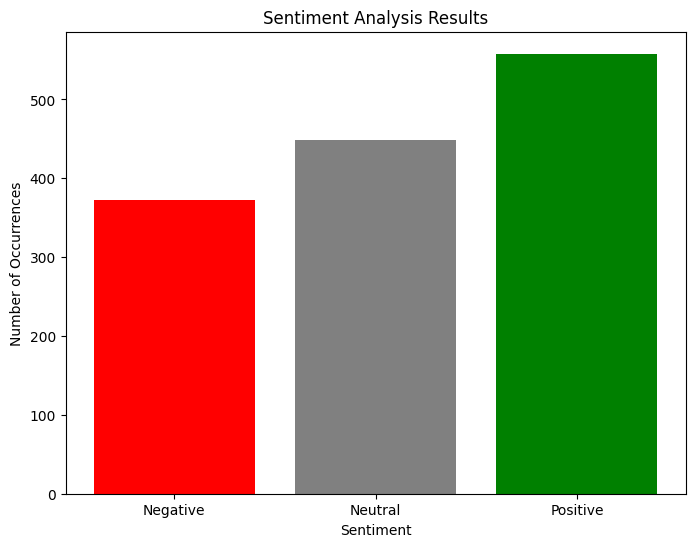

In [23]:
# Assuming the data is stored in a dictionary or pandas Series
sentiment_data = {-1: 372, 0: 448, 1: 558}
# Extract keys and values
labels = ['Negative', 'Neutral', 'Positive']
values = [sentiment_data[-1], sentiment_data[0], sentiment_data[1]]

# Create a bar plot for sentiment analysis
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['red', 'gray', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Occurrences')
plt.title('Sentiment Analysis Results')
plt.show()

In [24]:
# Calculate the total number of occurrences
total_occurrences = sum(sentiment_data.values())
# Calculate the weighted average
weighted_average = sum(score * count for score, count in sentiment_data.items()) / total_occurrences
weighted_average

0.13497822931785197

Result - the sentiment for Imdb is positive

### Exploring relationship between polarity and subjectivity

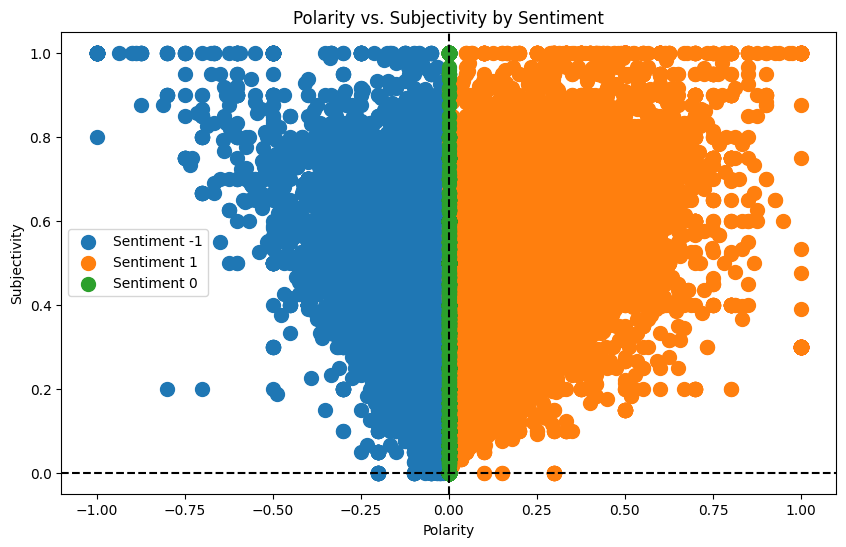

In [25]:
# Create a DataFrame
df_rel = pd.DataFrame(dfsent)

# Plotting the data
plt.figure(figsize=(10, 6))

# Scatter plot of Polarity vs Subjectivity
for sentiment in df_rel['sentiment'].unique():
    subset = df_rel[df_rel['sentiment'] == sentiment]
    plt.scatter(subset['polarity'], subset['subjectivity'], label=f'Sentiment {sentiment}', s=100)

plt.title('Polarity vs. Subjectivity by Sentiment')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.legend()
plt.show()